In [1]:
 # Import necessary libraries
 import pandas as pd
 import matplotlib.pyplot as plt
 from sklearn.cluster import KMeans
 from sklearn.preprocessing import StandardScaler
 from scipy.cluster.hierarchy import dendrogram, linkage
 from sklearn.cluster import AgglomerativeClustering
 import numpy as np
 import seaborn as sns

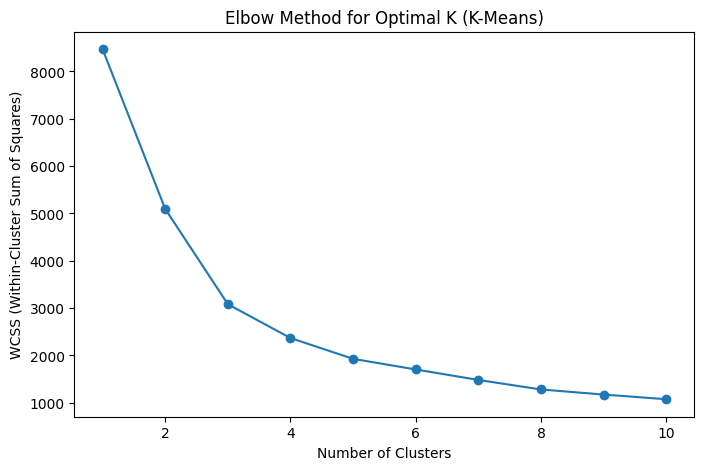

Number of clusters determined by K-Means (Elbow Method): 3


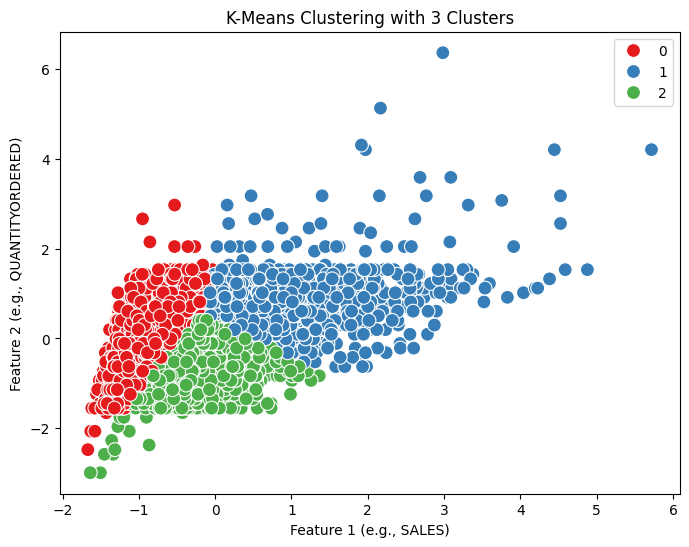

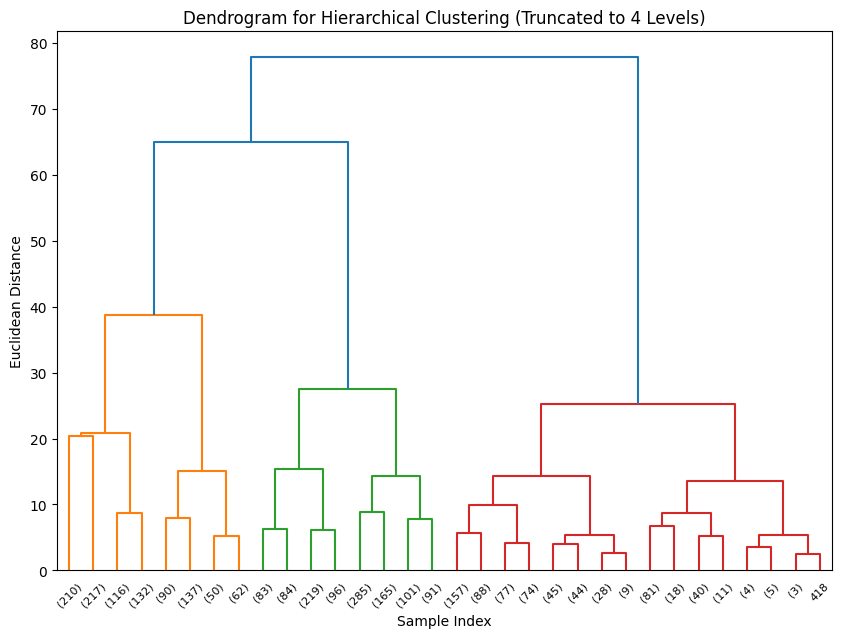

Number of clusters determined by Hierarchical Clustering: 2541


In [7]:

data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')

# Preprocess the dataset (choose relevant features)
features = data[['SALES', 'QUANTITYORDERED', 'PRICEEACH']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to determine the optimal number of clusters for K-Means
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Automatically determine the optimal number of clusters from the elbow
def optimal_k_elbow(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 10, wcss[-1]
    distances = []
    for i in range(10):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
        denominator = np.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)
        distances.append(numerator / denominator)
    return distances.index(max(distances)) + 1  # Corrected indentation

optimal_k = optimal_k_elbow(wcss)

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Print the number of clusters for K-Means
print(f'Number of clusters determined by K-Means (Elbow Method): {optimal_k}')

# Plot K-Means clusters with colored datapoints
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=kmeans_labels, palette='Set1', s=100)
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('Feature 1 (e.g., SALES)')
plt.ylabel('Feature 2 (e.g., QUANTITYORDERED)')
plt.show()

# Perform hierarchical clustering using 'ward' linkage method
linked = linkage(scaled_features, method='ward')

# Plot the dendrogram showing the first 4 levels (truncate_mode='level', p=4)
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, truncate_mode='level', p=4)
plt.title('Dendrogram for Hierarchical Clustering (Truncated to 4 Levels)')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

# Automatically determine the number of clusters from the dendrogram
def get_optimal_clusters_from_dendrogram(linked, threshold=0.7):
    dendrogram_data = dendrogram(linked, no_plot=True)
    distances = np.diff(dendrogram_data['dcoord'], axis=1).ravel()
    threshold_distance = np.percentile(distances, threshold * 100)
    num_clusters = np.sum(distances > threshold_distance) + 1
    return num_clusters

optimal_hc = get_optimal_clusters_from_dendrogram(linked)

# Apply hierarchical clustering with the chosen number of clusters
# Apply hierarchical clustering with the chosen number of clusters
hc = AgglomerativeClustering(n_clusters=optimal_hc, linkage='ward')
hierarchical_labels = hc.fit_predict(scaled_features)

# Print the number of clusters for hierarchical clustering
print(f'Number of clusters determined by Hierarchical Clustering: {optimal_hc}')